<a href="https://colab.research.google.com/github/Cas-Maravilha/FarmTech-na-Era-da-Cloud-Computing/blob/main/Cl%C3%A1udio_dos_Santos%2C_RM562948_e_pbl_fase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ======================================
# ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# Dataset: crop_yield 2.csv
# ======================================

# Importando bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuração de estilo para gráficos
plt.style.use("ggplot")
sns.set_palette("Set2")

In [ ]:
# 1. Carregando a base
df = pd.read_csv("/content/drive/MyDrive/Cópia de crop_yield.csv")

In [ ]:
# 2. Visualizando as 5 primeiras linhas
print("Visualização inicial do dataset:")
display(df.head())

Visualização inicial do dataset:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [ ]:
# 3. Informações gerais
print("\nInformações da base:")
df.info()


Informações da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [ ]:
# 4. Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


In [ ]:
# 5. Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


In [ ]:
# 6. Verificar duplicados
print("\nRegistros duplicados:", df.duplicated().sum())


Registros duplicados: 0


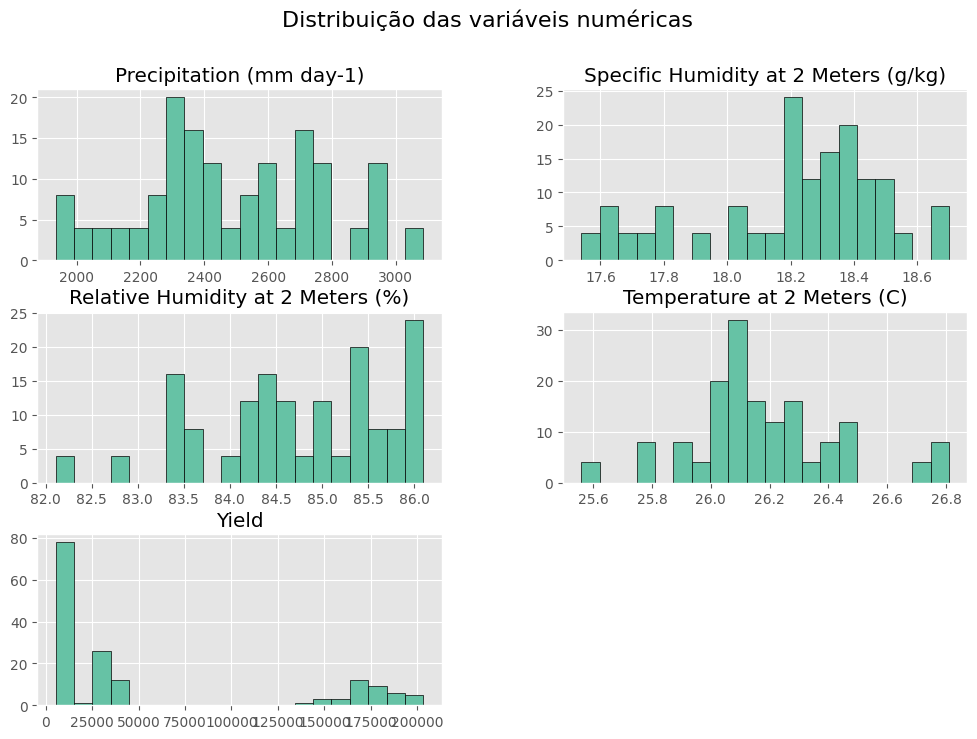

In [ ]:
# 7. Distribuição das variáveis numéricas
df.hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Distribuição das variáveis numéricas", fontsize=16)
plt.show()

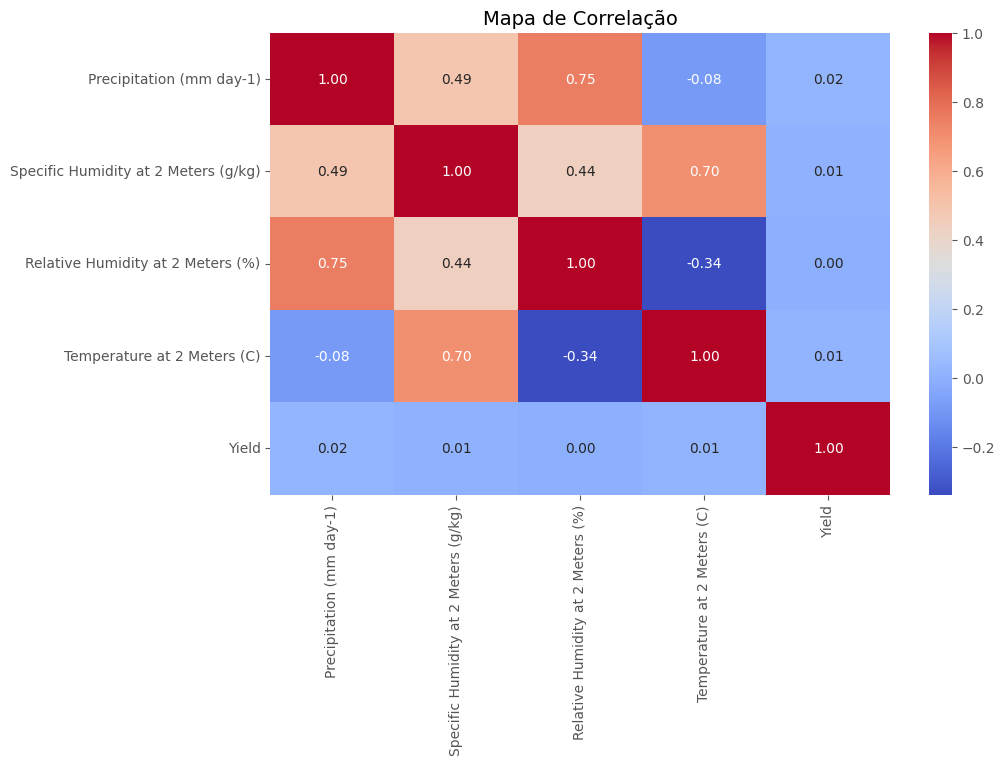

In [ ]:
# 8. Correlação entre variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação", fontsize=14)
plt.show()

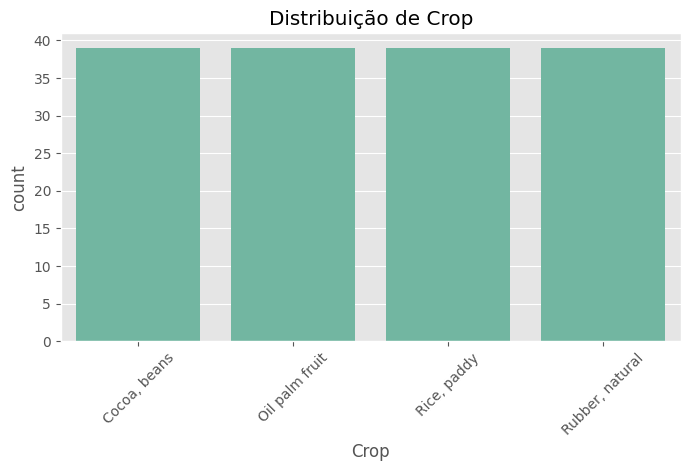

In [ ]:
# 9. Distribuição por variáveis categóricas (se existirem)
categoricas = df.select_dtypes(include=["object"]).columns
for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribuição de {col}")
    plt.xticks(rotation=45)
    plt.show()

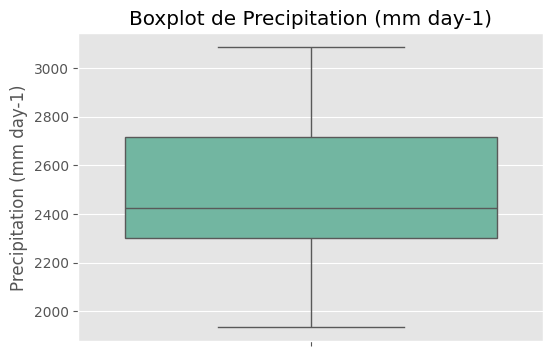

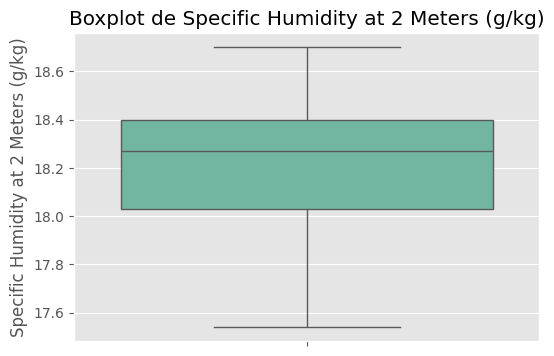

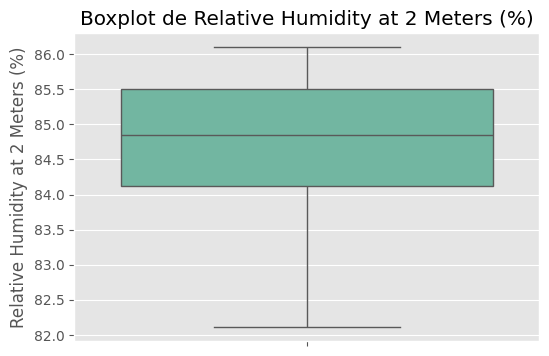

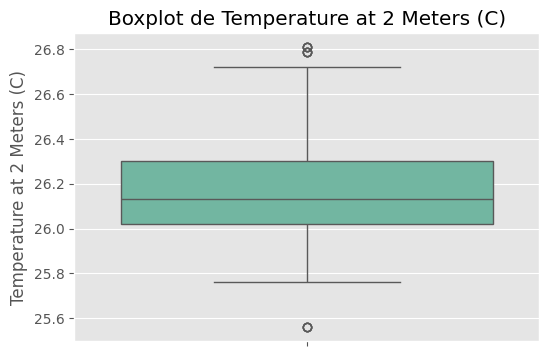

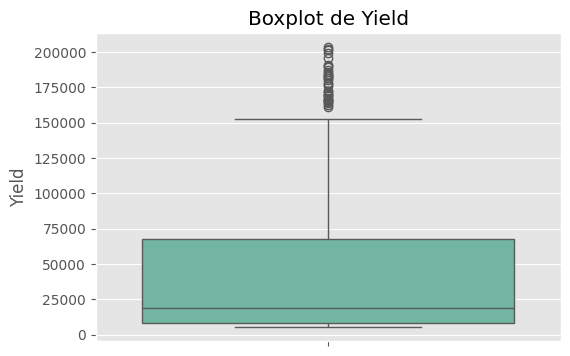

In [ ]:
# 10. Boxplots para verificar outliers
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [ ]:
# ANÁLISE DE TENDÊNCIAS E OUTLIERS
# ======================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [ ]:
# --- 1. Selecionar apenas variáveis numéricas
dados_num = df.select_dtypes(include=[np.number])

In [ ]:
# --- 2. Padronização dos dados (necessário para clustering)
scaler = StandardScaler()
dados_norm = scaler.fit_transform(dados_num)

In [ ]:
# --- 3. Usando PCA para reduzir dimensão e visualizar em 2D
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_norm)

In [ ]:
# --- 4. Clusterização com KMeans
# Definir número ideal de clusters (usando método do cotovelo)
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dados_norm)
    inertia.append(kmeans.inertia_)

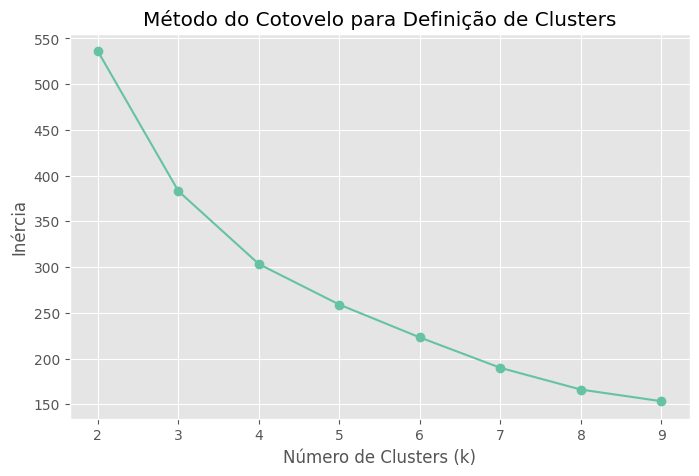

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(2,10), inertia, marker="o")
plt.title("Método do Cotovelo para Definição de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.show()

In [ ]:
# Escolher número de clusters (ex: 3, pode ser ajustado conforme o gráfico acima)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(dados_norm)

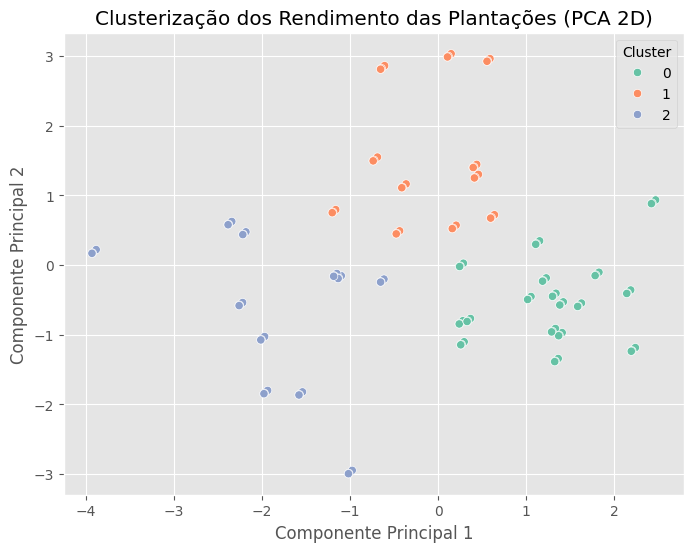

In [ ]:
# --- 5. Visualizar clusters no espaço PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=dados_pca[:,0], y=dados_pca[:,1], hue=df["Cluster"], palette="Set2")
plt.title("Clusterização dos Rendimento das Plantações (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [ ]:
# --- 6. Análise dos clusters
print("\nMédias de cada cluster:")
display(df.groupby("Cluster")[dados_num.columns].mean())


Médias de cada cluster:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
Cluster,,,,,
0,2733.517647,18.337647,85.652353,26.118824,56736.544118
1,2359.024545,18.392727,84.145455,26.480909,57453.000000
2,2232.217273,17.805455,83.916364,25.986364,53951.500000


In [ ]:
# --- 7. Detecção de outliers (cenários discrepantes) com Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df["Outlier"] = iso.fit_predict(dados_norm)

In [ ]:
# Ajustar rótulo para interpretação
df["Outlier"] = df["Outlier"].map({1:"Normal", -1:"Outlier"})

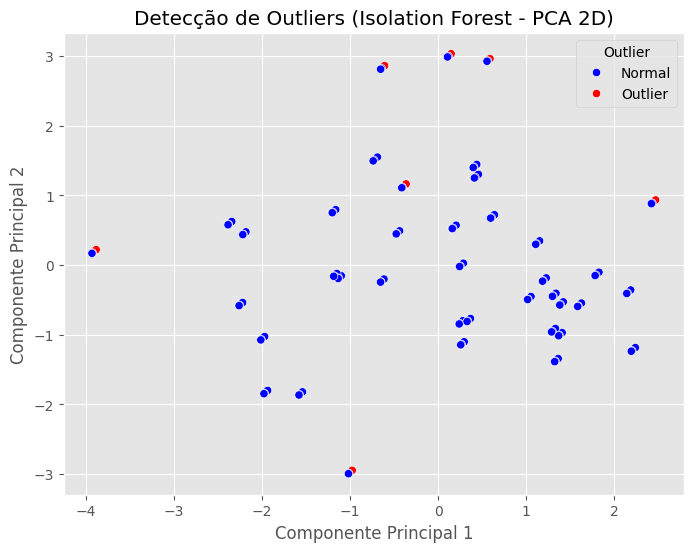

In [ ]:
# --- 8. Visualizar outliers no espaço PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=dados_pca[:,0], y=dados_pca[:,1], hue=df["Outlier"], palette={"Normal":"blue","Outlier":"red"})
plt.title("Detecção de Outliers (Isolation Forest - PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [ ]:
# --- 9. Contagem de outliers
print("\nQuantidade de outliers detectados:")
print(df["Outlier"].value_counts())


Quantidade de outliers detectados:
Outlier
Normal     148
Outlier      8
Name: count, dtype: int64


In [ ]:
# MODELAGEM PREDITIVA DO RENDIMENTO
# ======================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# 1. Definir X e y
# Supondo que a coluna alvo seja 'Yield' (ajuste se o nome for diferente)
X = df.drop(columns=["Yield", "Cluster", "Outlier"], errors="ignore")
y = df["Yield"]

In [ ]:
# Converter variáveis categóricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Definir os modelos
modelos = {
    "Regressão Linear": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel="rbf")
}

In [ ]:
# 4. Treinar, prever e avaliar
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    resultados.append([nome, mae, mse, rmse, r2])

In [ ]:
# 5. Comparar resultados
resultados_df = pd.DataFrame(resultados, columns=["Modelo", "MAE", "MSE", "RMSE", "R²"])
print("\nDesempenho dos Modelos:")
display(resultados_df)


Desempenho dos Modelos:


,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,3132.796384,1.930869e+07,4394.165819,0.995022
1,Ridge Regression,4452.248613,3.480047e+07,5899.191969,0.991028
2,Random Forest,2802.370938,2.383356e+07,4881.962383,0.993856
3,Gradient Boosting,3108.842605,3.671020e+07,6058.894234,0.990536
4,SVR,38974.582122,5.085638e+09,71313.662388,-0.311079


/tmp/ipython-input-2718782989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x="Modelo", y="R²", palette="viridis")


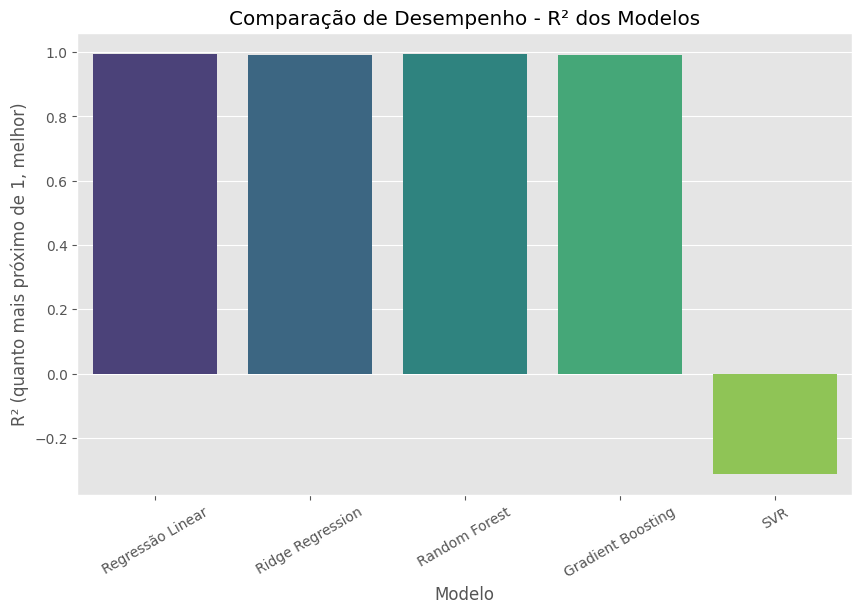

In [ ]:
# 6. Visualizar comparação de desempenho
plt.figure(figsize=(10,6))
sns.barplot(data=resultados_df, x="Modelo", y="R²", palette="viridis")
plt.title("Comparação de Desempenho - R² dos Modelos")
plt.ylabel("R² (quanto mais próximo de 1, melhor)")
plt.xticks(rotation=30)
plt.show()